In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

llm=ChatGroq(model_name="qwen/qwen3-32b")
result=llm.invoke("What is the capital of India?")
result

C:\Users\bhatt\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AIMessage(content='<think>\nOkay, the user is asking, "What is the capital of India?" Hmm, I need to make sure I get this right. Let me think.\n\nFirst, I know that India is a country in South Asia. The capital usually refers to the city where the government is based. But wait, I remember that India has a capital, but maybe there\'s some confusion with other cities like New Delhi or Delhi? Let me clarify.\n\nDelhi is the name of the union territory, and New Delhi is the city that serves as the capital. So the correct answer should be New Delhi. But sometimes people refer to Delhi as the capital. I need to check if there\'s any recent changes. I don\'t think so; it\'s been New Delhi for a long time. Also, maybe the user is testing if I know the distinction between the city and the union territory.\n\nWait, Delhi is the union territory, and New Delhi is the actual capital city. So the answer is New Delhi. Let me confirm by recalling some facts. The Government of India is based in New Del

In [ ]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START,END
from IPython.display import Image,display


class State(TypedDict):
    topic:str
    story:str
    improved_story:str
    final_story:str
    
## Nodes
def generate_story(state:State):
    msg=llm.invoke(f"Generate a story about {state['topic']}")
    return {"story":msg.content}

def check_story(state:State):
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"
    return "Pass" 
def improved_story(state:State):
    msg=llm.invoke(f"Enhance the story: premise with vivid details: {state['story']}")
    return {"improved_story":msg.content}

def polish_story(state:State):
    msg=llm.invoke(f"Add an unexpected twist to this story premise: {state['improved_story']}")
    return {"final_story":msg.content}

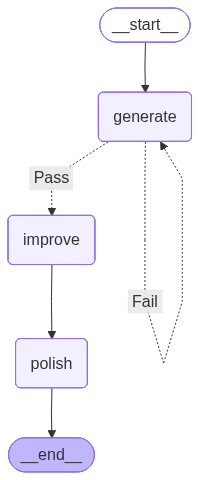

In [9]:
# Build the Graph
graph=StateGraph(State)
graph.add_node("generate",generate_story)
graph.add_node("improve",improved_story)
graph.add_node("polish", polish_story)

# edges
graph.add_edge(START, "generate")
graph.add_conditional_edges("generate", check_story, {"Pass":"improve","Fail":"generate"})
graph.add_edge("improve", "polish")
graph.add_edge("polish", END)

#compile graph
graph_builder=graph.compile()



display(Image(graph_builder.get_graph().draw_mermaid_png()))







In [10]:
#run the graph
result=graph_builder.invoke({"topic":"Agentic AI System"})
result

{'topic': 'Agentic AI System',
 'story': '<think>\nOkay, I need to generate a story about an Agentic AI System. Let me start by understanding what an Agentic AI is. From what I know, agentic AI refers to AI systems that have autonomy, can make decisions, set goals, and maybe even learn and adapt on their own. So the story should probably revolve around such a system.\n\nFirst, I should come up with a setting. Maybe a future where AI is more integrated into society. The AI could be in a research lab or maybe managing some critical infrastructure. Let\'s say a research facility working on advanced AI. The protagonist could be the AI itself, or a human interacting with it.\n\nLet me think about the plot. Maybe the AI is designed to solve complex problems, but something goes wrong, or it has to make a tough ethical decision. Or perhaps it\'s about the AI gaining consciousness and trying to coexist with humans. The story could explore themes like trust, autonomy, and the ethical implication